# Classification Neural Network

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# Creaye data
from sklearn.datasets import make_circles

# 1000 circles
n_samples = 1000
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [3]:
# Check features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
# Combine features and labels into dataset
import pandas as pd
circles = pd.DataFrame({
    "X0": X[:, 0],
    "X1": X[:, 1],
    "labels": y
})
circles

,X0,X1,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


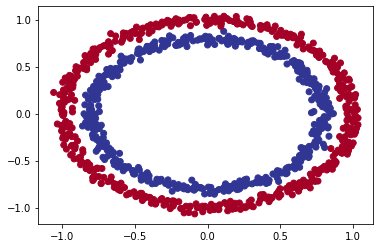

In [6]:
# Visualise with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

## Model 1

In [8]:
# Create a model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile a model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# Fit a model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.9452 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.7114 - accuracy: 0.4760
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 2.1979 - accuracy: 0.5050
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7304 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.4970


In [9]:
# Attempts to improve through longer training
model_1.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4940
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4910
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4580
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4510
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4870
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5030
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4870
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5020
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4790
Epoch 11/

In [10]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4780


[0.6931537985801697, 0.4779999852180481]

## Model 2

In [11]:
# Create a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# Fit a model
model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.0654 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.4730
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4910
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4990
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4930
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5130
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4970
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5170
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4930
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4800
Epoch 11/

In [12]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933231949806213, 0.5]

## Model 3

In [13]:
# Create a model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit a model
model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.6980 - accuracy: 0.4390
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7137 - accuracy: 0.4930
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.5080
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4510
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4620
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4960
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5040
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5110
Epoch 11/

In [14]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5000


[0.6966301202774048, 0.5]

## Function to visualise predictions of the model

In [15]:
import numpy as np

def plot_decision_boundary(model, X, y):
    # create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].nax() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )